In [2]:
from __future__ import print_function
import pylab as pl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
seed(100)
mymean=90
list_hw3={}
print (list_hw3)

{}


# 1.Chi-sq distribution

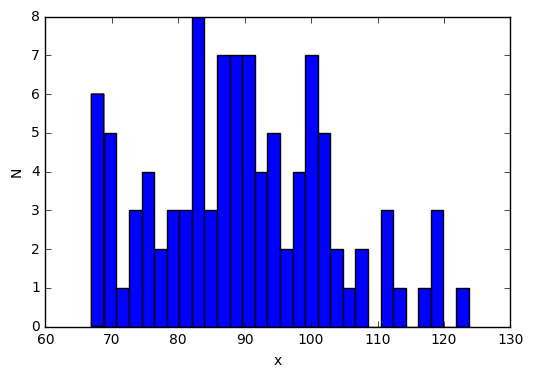

In [4]:
df=mymean
list_hw3['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(list_hw3['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 90, N=100

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(list_hw3['chisq'].mean(), list_hw3['chisq'].std()))

Chisq mean: 89.88, standard deviation: 13.35


In [10]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[906 881 221 427 204 529 562 141  21 828 415 838 164  92 884 405 654 914
 204 672 513 396 317 251 824 374 397 701  20 628 505 288 511 393 316 106
 841 234 737 864 437 969 955 832 526 323 424 672 832   8 394 995 104 553
 996 304 975 492 293  87 722 961 869 358 735 621  91  40 323 496  18 662
 511 568 178 809 248 103 540 518 565 951 944 611  10  57 230   8 226  75
 362 513 259 272 952 160 109 371 102 280] (100,)


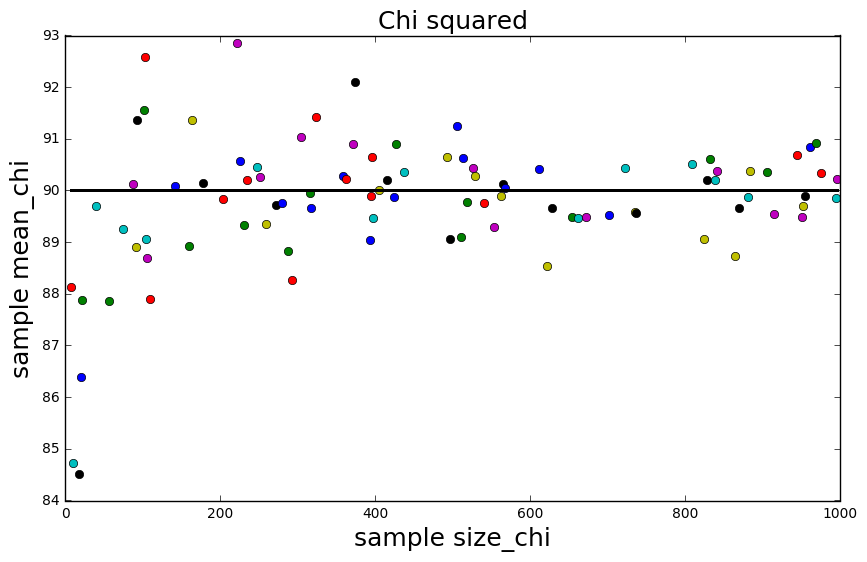

In [26]:
list_hw3['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    list_hw3['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

list_hw3['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['chisq']:
    if not type(nn) == str:
        list_hw3['chisq']['means'][nn] = list_hw3['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, list_hw3['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_chi', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_chi', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


### Figure 2: The sample mean is close to 90 (=mymean/the mean of chi-sq)

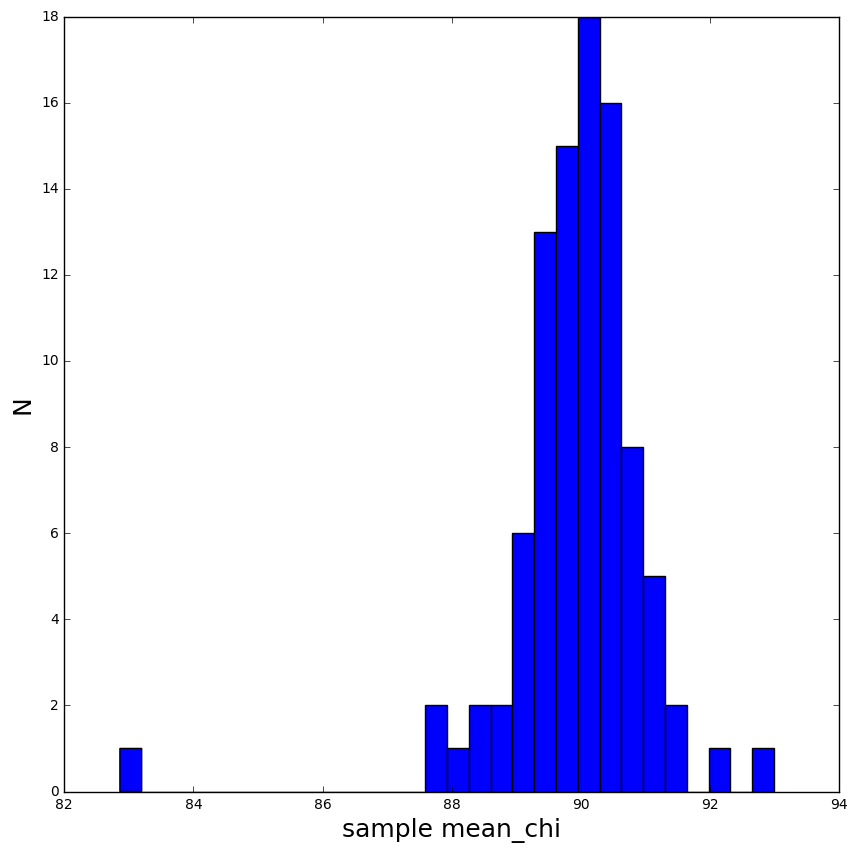

In [25]:
allmeans_chi = list(list_hw3['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chi,bins=30)
pl.xlabel('sample mean_chi', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: From the distribution figure of sample means, we can see it is closed to 90(mymean)

# 2.Normal Distribution

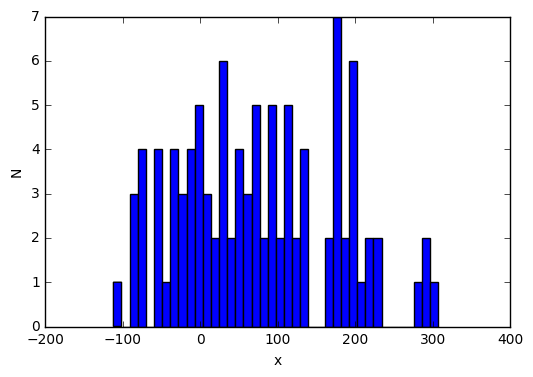

In [20]:
# In normal distribution, the loc equals to the mean
loc = mymean
#print (loc)
list_hw3['normal'] = np.random.normal(loc, scale=100, size=100)
pl.hist(list_hw3['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Normal distribution: loc=90, scale=100, N=100

In [19]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(list_hw3['normal'].mean(), list_hw3['normal'].std()))

Normal mean: 96.25, standard deviation: 100.34


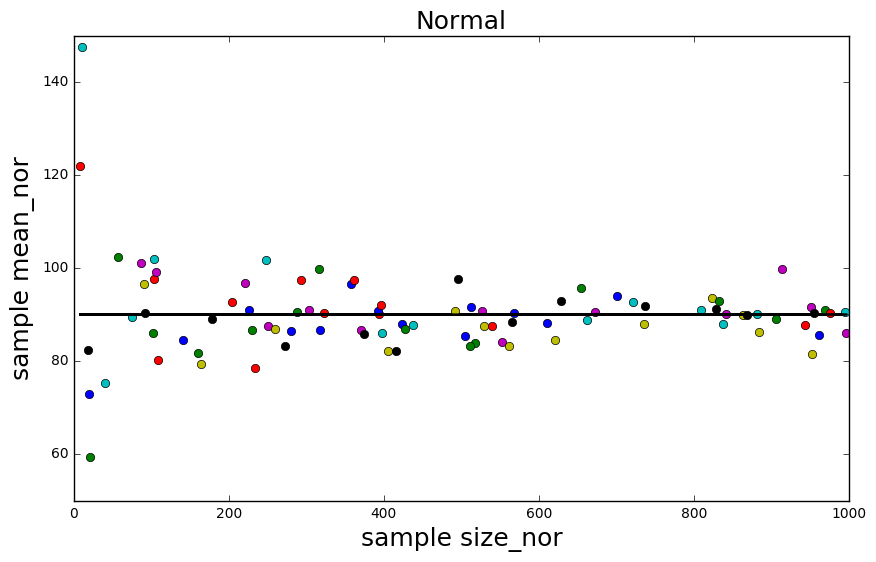

In [23]:
list_hw3['normal'] = {} 

for n in mysize:
    list_hw3['normal'][n] = np.random.normal(loc, scale = 100, size = n)
       

list_hw3['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['normal']:
    if not type(nn) == str:
        list_hw3['normal']['means'][nn] = list_hw3['normal'][nn].mean()
        
        axchisq_mu_n.plot(nn, list_hw3['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_nor', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_nor', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [loc,loc], 'k')

### Figure 2: The sample mean is close to 90 (=mymean/the mean of the normal distribution)

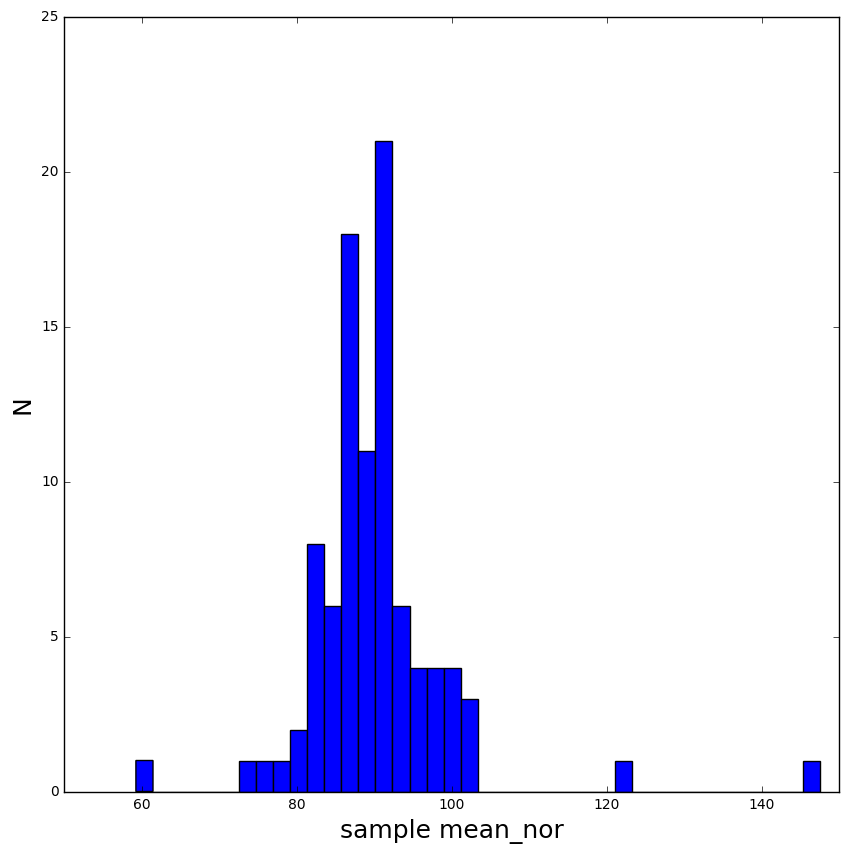

In [24]:
allmeans_nor = list(list_hw3['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_nor,bins=40)
pl.xlabel('sample mean_nor', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: From the distribution figure of sample means, we can see it is closed to 90(mymean)

# 3. Poisson Distribution

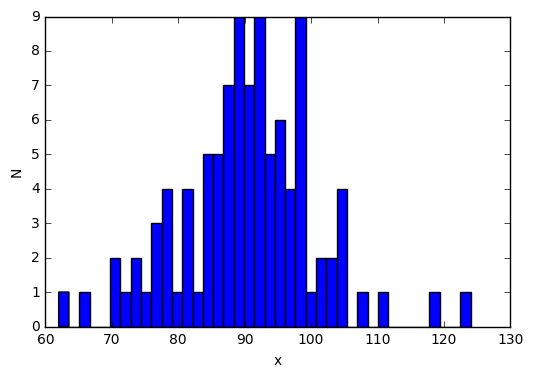

In [27]:
# In poisson distribution, the lam equals to the mean
lam = mymean
list_hw3['poisson'] = np.random.poisson(lam, size=100)
pl.hist(list_hw3['poisson'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Poisson distribution: lam=90, N=100

In [29]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(list_hw3['poisson'].mean(), list_hw3['poisson'].std()))

Poisson mean: 90.29, standard deviation: 10.25


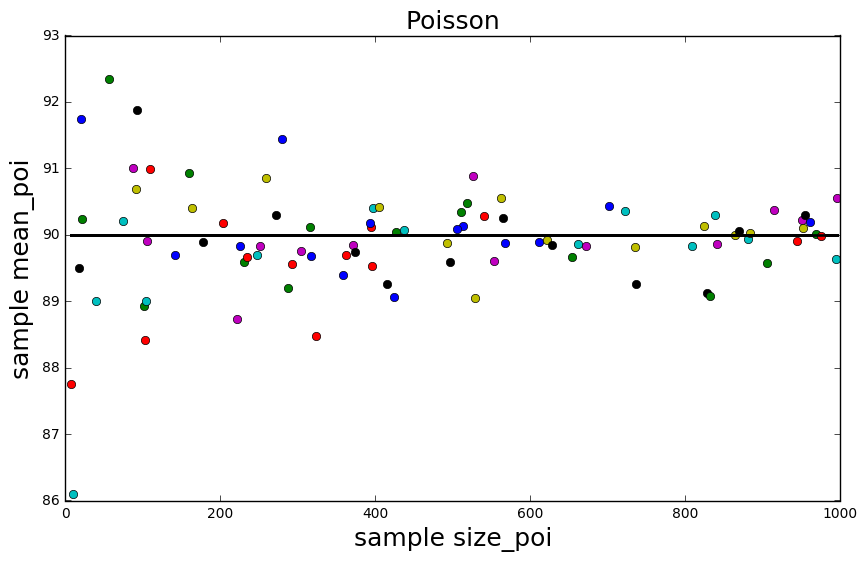

In [32]:
list_hw3['poisson'] = {} 

for n in mysize:
    list_hw3['poisson'][n] = np.random.poisson(lam, size = n)
       

list_hw3['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['poisson']:
    if not type(nn) == str:
        list_hw3['poisson']['means'][nn] = list_hw3['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, list_hw3['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_poi', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_poi', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [lam,lam], 'k')

### Figure 2: The sample mean is close to 90 (=mymean/the mean of the poission distribution)

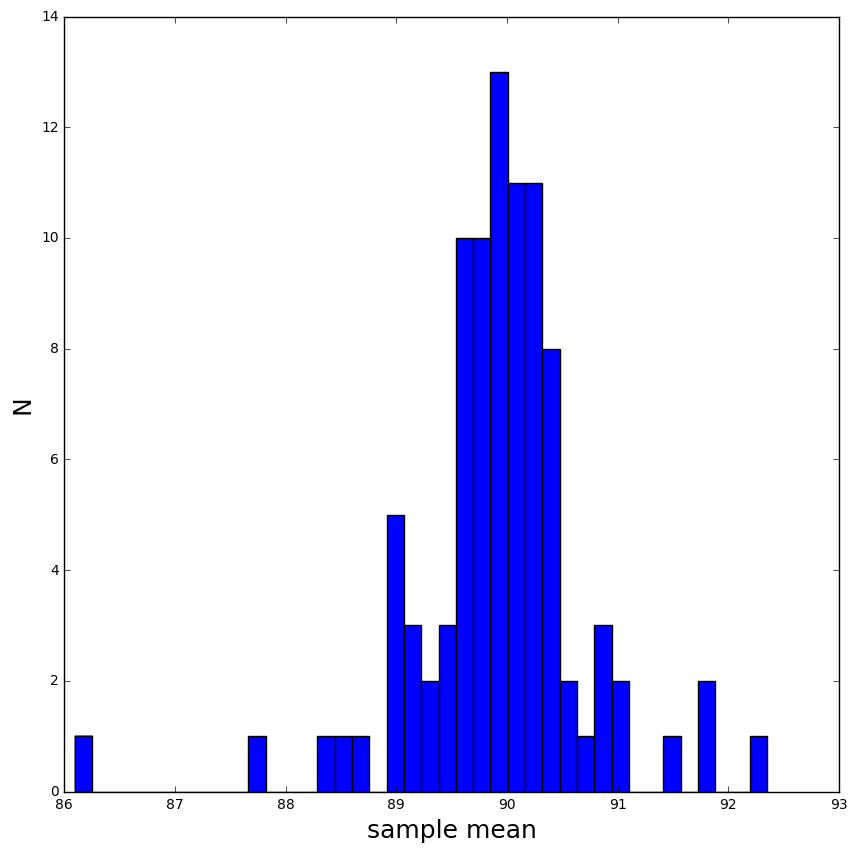

In [34]:
allmeans_poi = list(list_hw3['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_poi,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: From the distribution figure of sample means, we can see it is closed to 90(mymean)

# 4. Binomial Distribution

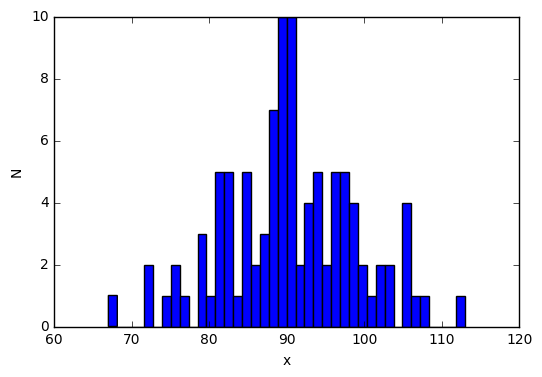

In [47]:
# In binomial distribution, the result of n*p equals to the mean
n = 900
p = 0.1
list_hw3['binomial'] = np.random.binomial(n, p, size=100)
pl.hist(list_hw3['binomial'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Fig1 Binomial Distribution,n=900,p=0.1

In [48]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(list_hw3['binomial'].mean(), list_hw3['binomial'].std()))

Binomial mean: 90.46, standard deviation: 8.58


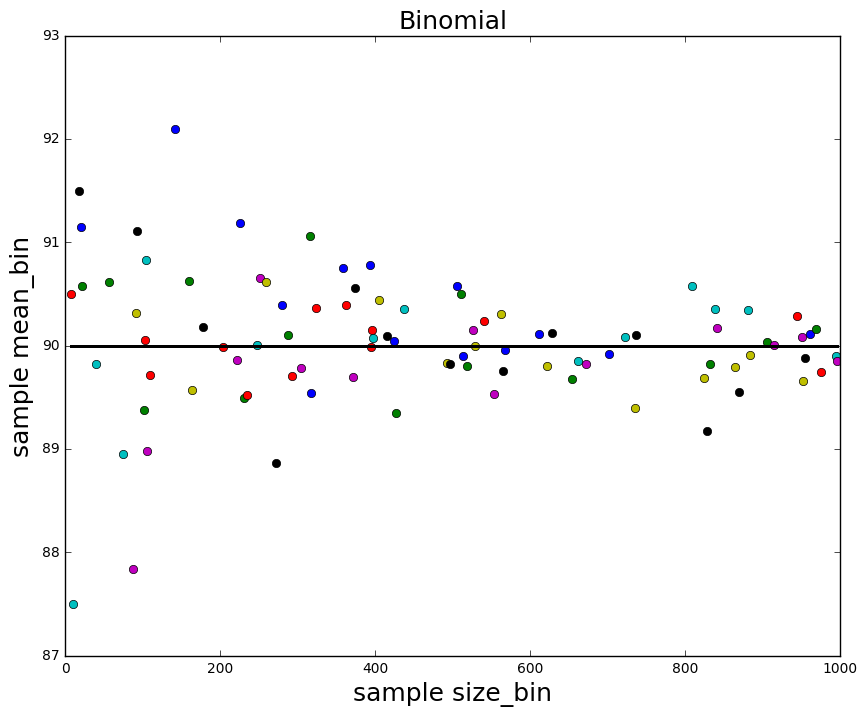

In [51]:

list_hw3['binomial'] = {}
for x in mysize:
    list_hw3['binomial'][x] = np.random.binomial(n, p, size = x)
       

list_hw3['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list_hw3['binomial']:
    if not type(ii) == str:
        list_hw3['binomial']['means'][ii] = list_hw3['binomial'][ii].mean()
        
        axchisq_mu_n.plot(ii, list_hw3['binomial']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size_bin', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_bin', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [n*p,n*p], 'k')

### Figure 2: The sample mean is close to 90 (=mymean/the mean of binomial distribution)

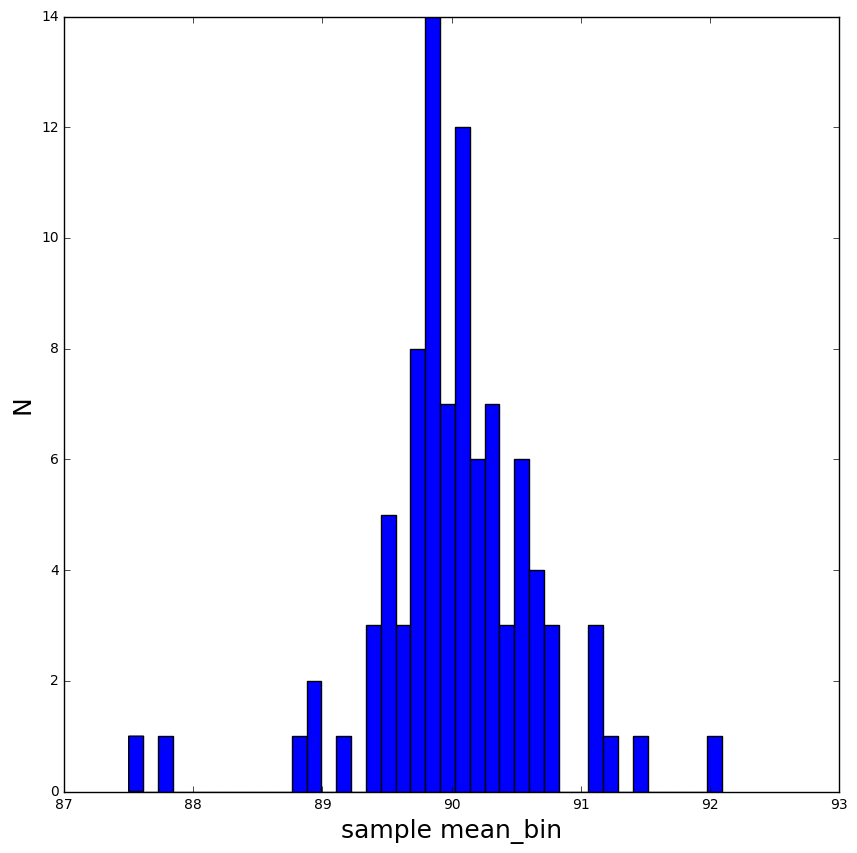

In [52]:
allmeans_bin = list(list_hw3['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_bin,bins=40)
pl.xlabel('sample mean_bin', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: From the distribution figure of sample means, we can see it is closed to 90(mymean)

# 5. Exponential Distribution

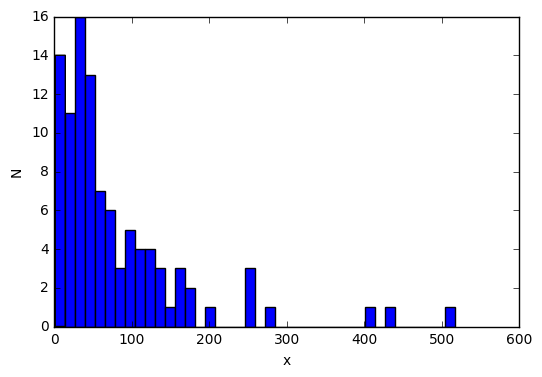

In [64]:
scale=mymean
list_hw3['exponential'] = np.random.exponential(scale, size=100)
pl.hist(list_hw3['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Fig1.Exponential Distribution, scale=90, size=100

In [65]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(list_hw3['exponential'].mean(), list_hw3['exponential'].std()))

Exponential mean: 79.80, standard deviation: 89.65


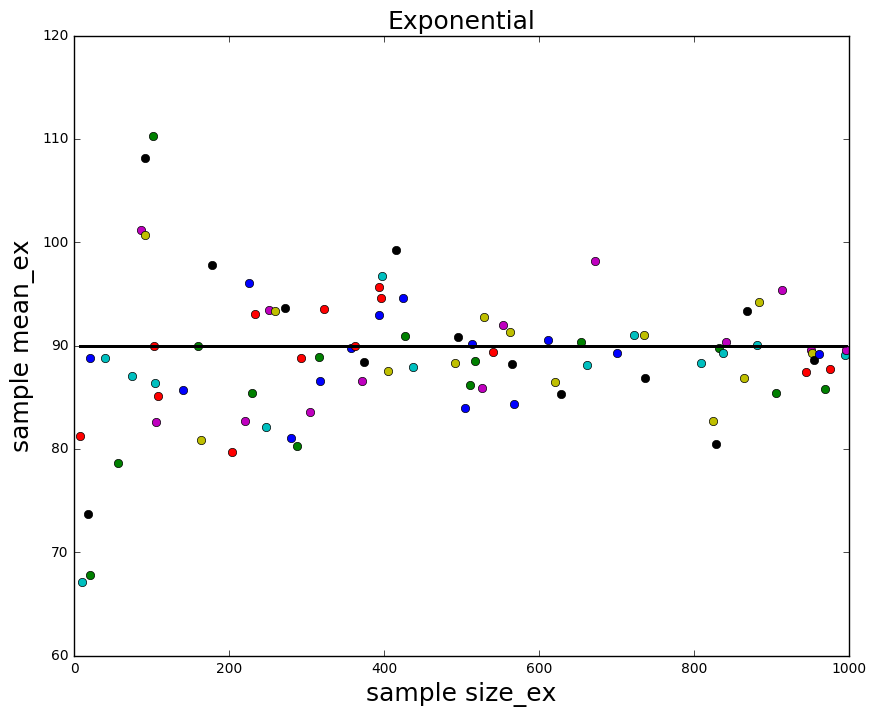

In [63]:
list_hw3['exponential'] = {} 

for i in mysize:
    list_hw3['exponential'][i] = np.random.exponential(scale, size = i)
       

list_hw3['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list_hw3['exponential']:
    if not type(ii) == str:
        list_hw3['exponential']['means'][ii] = list_hw3['exponential'][ii].mean()
        axchisq_mu_n.plot(ii,list_hw3['exponential']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size_ex', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_ex', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [scale,scale], 'k')

### Figure 2: The sample mean is close to 90 (=mymean/the mean of Exponential Distribution)

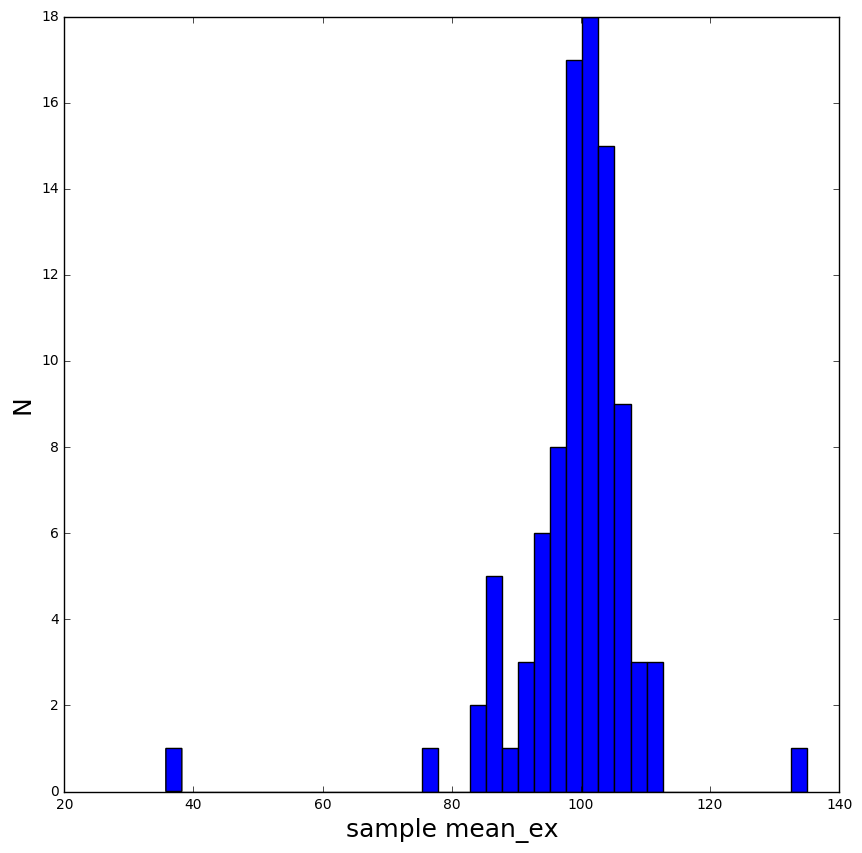

In [60]:
allmeans_ex = list(list_hw3['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_ex,bins=40)
pl.xlabel('sample mean_ex', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: From the distribution figure of sample means, we can see it is closed to 90(mymean)